## TOC
- [Imports](#Imports)
- [Loading Model](#Loading-Model)

## Imports
FastAI: The library which will be used to load our trained model.  
PIL (Pillow): Image manipulator, enhancer.

In [1]:
from fastai.vision.all import *
from PIL import Image, ImageEnhance
import io

## Loading Model
> We will load the trained model which is saved pickel that includes all the trained model paramaters as objects.

In [2]:
learner = load_learner('/kaggle/input/0x2ahack-data/trained_model.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


> We will create predict_img function which will take img path as argument and resize it to 256x256 which is then converted to grayscale and the contrast of the image is increased by 500% to focus on person details

> We will create predict_img function which will take img path as argument and resize it to 256x256 which is then converted to grayscale passes through multiple filters to predict based on light

In [3]:
def predict_img(img):
    enhancer = ImageEnhance.Brightness(img)
    bright_img = enhancer.enhance(1.5)
    enhancer = ImageEnhance.Contrast(bright_img)
    contrasted_img = enhancer.enhance(0.6)
    enhancer = ImageEnhance.Sharpness(contrasted_img)
    sharp_img = enhancer.enhance(2)
    res = learner.predict(sharp_img)
    display(contrasted_img)
    print(res)

In [4]:
def predict_local(img_path):
    img = Image.open(img_path).resize([256,256]).convert('L')
    predict_img(img)

In [5]:
def predict_online(img_loc):
    resp = requests.get(img_loc)
    if resp.status_code == 200:
        img = Image.open(io.BytesIO(resp.content)).resize([256,256]).convert('L')
        predict_img(img)

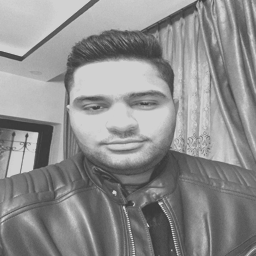

('True', tensor(1), tensor([0.1137, 0.8863]))


In [6]:
predict_local('/kaggle/input/temp12/1000106061.jpg')